In [1]:
'''
Complete the LoadData function for this assignment, and create the decision tree for diabetes data
'''

'\nComplete the LoadData function for this assignment, and create the decision tree for diabetes data\n'

In [1]:
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
import LoadData as ld
print (__name__)
print (ld.LoadData.__defaults__)

Importing LoadData
__main__
(',', True)


In [3]:
filename = "bill_authentication.csv"
cols = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]
x_train,y_train,x_test,y_test = ld.LoadData(filename, cols, normalize=False)
print (x_train.shape, x_test.shape)
print (y_test[0])

(1097, 4)
(1097, 4) (275, 4)
[1]


In [4]:
## DecisionTreeClassifier gini
model = DecisionTreeClassifier(criterion = "gini", splitter = "best")
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print ("Test data accuracy", accuracy_score(y_test, y_pred_test))
print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", model.score(x_train, y_train))

Test data accuracy 0.9818181818181818
Train data accuracy 1.0
Train Data score 1.0


In [6]:
print ("Train Data score", model.score(x_train, y_train)) #Returns mean accuracy of test samples
print ("Test Data score", model.score(x_test, y_test))

Train Data score 1.0
Test Data score 0.9818181818181818


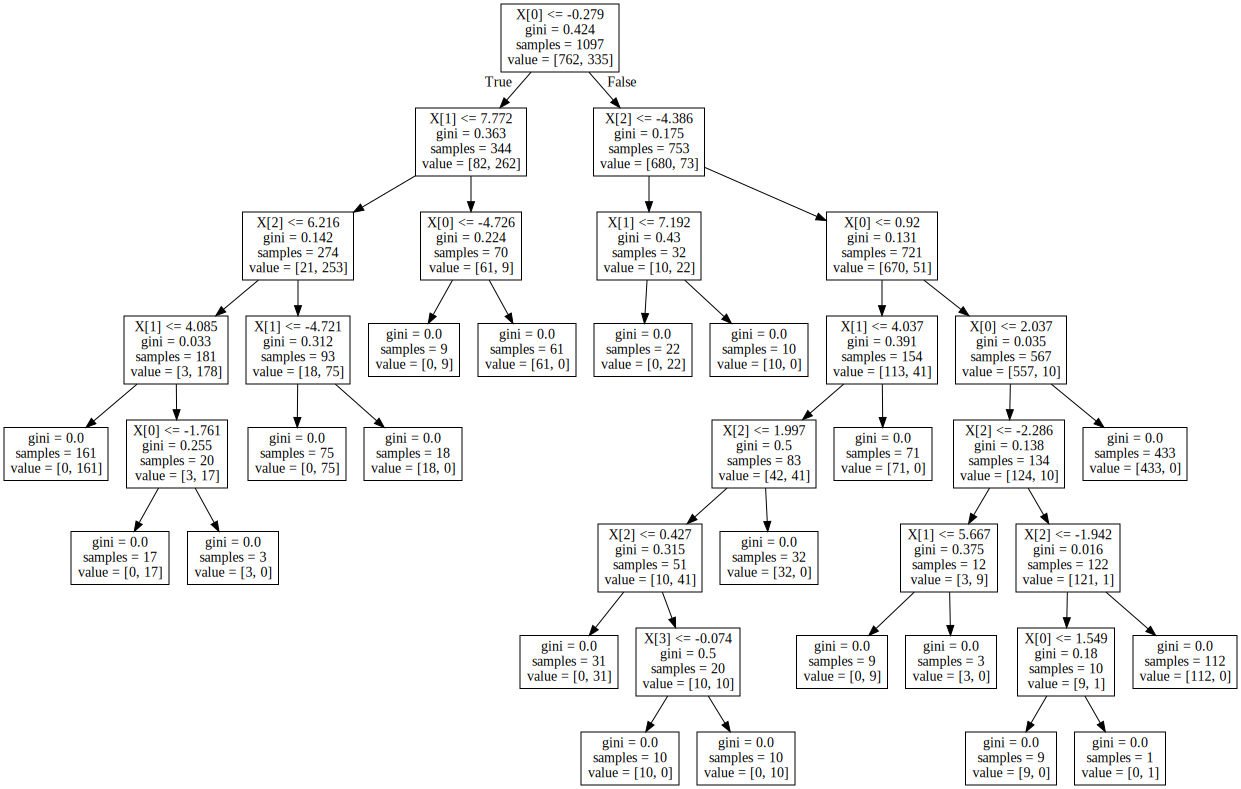

In [7]:
import os
import graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data) 
graph

In [5]:
model.set_params(splitter="random")
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print ("Test data accuracy", accuracy_score(y_test, y_pred_test))
print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", model.score(x_train, y_train))
print ("Train Data score", model.score(x_test, y_test))


Test data accuracy 0.9963636363636363
Train data accuracy 1.0
Train Data score 1.0
Train Data score 0.9963636363636363


In [6]:
models = [(DecisionTreeClassifier(criterion = "gini", splitter = "best"), "gini"),
             (DecisionTreeClassifier(criterion="entropy"), "entropy"),
          (DecisionTreeClassifier(criterion = "gini", splitter = "random"), "Random")
         ]
for m in models:
    m[0].fit(x_train, y_train)
    y_pred_train = (m[0].predict(x_train))
    y_pred_test = (m[0].predict(x_test))
    print ("Testing data set, using =  ", m[1], "Accuracy= ",  accuracy_score(y_test, y_pred_test))
    print ("Training data set, using =  ", m[1], "Accuracy= ", accuracy_score(y_train, y_pred_train))

Testing data set, using =   gini Accuracy=  0.9818181818181818
Training data set, using =   gini Accuracy=  1.0
Testing data set, using =   entropy Accuracy=  0.9672727272727273
Training data set, using =   entropy Accuracy=  1.0
Testing data set, using =   Random Accuracy=  0.9927272727272727
Training data set, using =   Random Accuracy=  1.0


In [7]:
print (__name__)
#print (globals()["x_train"])

__main__


In [ ]:
#Steps to address overfitting
modelOF1 = [(DecisionTreeClassifier(criterion = "gini", splitter = "best", max_depth=4)